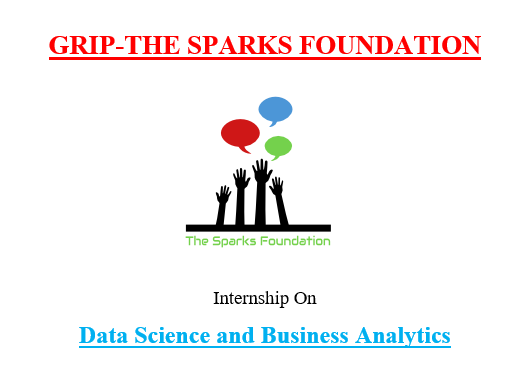

# **Name : Hrushikesh Balasaheb Ambre**
# **Task 1 : Prediction using Supervised ML**
## 1) Predict the percentage of a student based on the no. of study hours.
## 2) What will be predicted score if a student studies for 9.25 hrs/ day?

### **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### **Importing The DataSet**

In [2]:
Data = pd.read_csv("http://bit.ly/w-data")

### **Display The Data From The DataSet**

In [4]:
Data.head()  # Frist 5 Rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
Data.tail()  # Last 5 Rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
Data.shape

(25, 2)

In [7]:
Data.describe() # able to see mathematical insights of data.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Summeryof the Dataset**

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### **Check if there any null value in the Dataset**

In [9]:
Data.isnull == True

False

**Our Dataset has 25 rows and 2 columns and has no null Values.**

### **Visualization of Data**

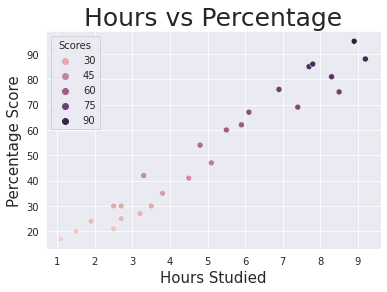

In [19]:
#Plotting the distribution of scores
sns.set_style('darkgrid')
sns.scatterplot(y= Data['Scores'], x= Data['Hours'], hue= Data['Scores']) 
plt.title('Hours vs Percentage', size=25)  
plt.xlabel('Hours Studied', size=15)  
plt.ylabel('Percentage Score', size=15)  
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

## **Linear Regression Model**
Now we prepare the data and split it in test data

In [20]:
#Splitting training and testing data
x=Data.iloc[:,:-1].values
y=Data.iloc[:,1].values


**The split of data into the training and test sets is very important as in this time we will be using Scikit Learn's builtin method of train_test_split()**

## **Train the Algoritham**

### **1) Splitting the Data**

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.80,test_size=0.20,random_state=0)

### **2) Fitting the Data into the model**

In [24]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)
print("---------Model Trained---------")

---------Model Trained---------


### **Plotting the regression line**

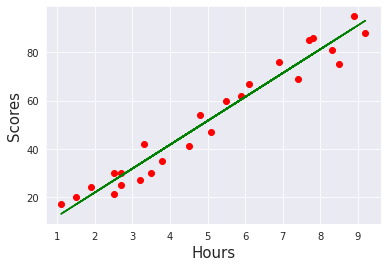

In [36]:
line = regression.coef_*x+regression.intercept_
plt.scatter(x, y, color="red")
plt.plot(x, line, color="green")
plt.xlabel("Hours", fontsize= 15)
plt.ylabel("Scores", fontsize= 15)
plt.show()

### **Predicting The Scores For The Model**

In [38]:
print(x_test)   
y_pred = regression.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### **Comparing the Predicted Marks with the Actual Marks**

In [40]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})    
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Checking the accuracy scores for training and test set**

In [42]:
print('Test Score')
print(regression.score(x_test, y_test))
print('Training Score')
print(regression.score(x_train, y_train))

Test Score
0.9454906892105354
Training Score
0.9515510725211552


### **Accuracy Of The Model**

In [43]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105354

## **Accuracy Of The Model 94%**

### **Visually Comparing the Predicted Marks with the Actual Marks**

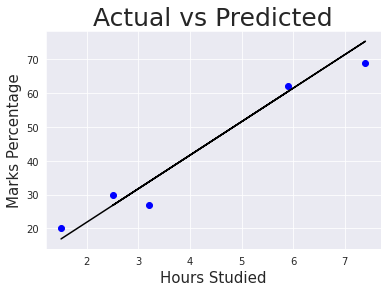

In [48]:
plt.scatter(x=x_test, y=y_test, color='blue')
plt.plot(x_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

### **Predict the score for 9.25 hours**

In [53]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


# **CONCLUSION**

## **According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.693 marks.**